## > Import Packages

In [1]:
## Import packages
from scipy.io import loadmat
from sklearn import preprocessing
from tabulate import tabulate
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
from skimage.color import label2rgb
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import svm
import pandas as pd
import numpy as np
import statistics 
import math
import time
import sys

## Import DL
import keras 
from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D , Conv1D, Flatten, MaxPooling1D
from keras.models import Sequential

In [2]:
## Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## > Load Data

In [ ]:
i=1

In [3]:
## Load Data
img = loadmat('/content/drive/My Drive/Major_Project/Data/PaviaU.mat')
img_gt = loadmat('/content/drive/My Drive/Major_Project/Data/PaviaU_gt.mat')
# img = loadmat('/content/drive/My Drive/Major_Project/Data/Indian_Pines.mat')
# img_gt = loadmat('/content/drive/My Drive/Major_Project/Data/Indian_Pines_gt.mat')
img_dr = np.load('/content/drive/My Drive/Major_Project/Test_Results3/test3_reduced_img_25.npy')
# img_dr = np.load('/content/drive/My Drive/Major_Project/Supervised_Results/Indian_Pines/reduced_img_f_dr_25.npy')
# img_dr = np.load('/content/drive/My Drive/Major_Project/unSupervised_Results/Indian_Pines/reduced_img_f_dr_28.npy')
img = img['paviaU']
gt = img_gt['paviaU_gt']
# img = img['indian_pines_corrected']
# gt = img_gt['indian_pines_gt']
height, width, bands = img.shape[0], img.shape[1], img.shape[2]
# img = np.reshape(img, [height*width, bands])
# img_gt = np.reshape(gt, [height*width,])

# plt.figure(2)
# plt.plot(img[0,])
# plt.title('Spectral Response Curve')
# plt.xlabel('Band Number')
# plt.ylabel('Reflectance')
# plt.savefig('SRC.png',dpi=300)
# num_classes = len(np.unique(gt))
# mymap = plt.get_cmap('parula', 10)
# fig, ax = plt.figure()
# heatmap = ax.pcolor(data, cmap=parula)

#legend
# cbar = plt.colorbar(heatmap)

# plt.figure()
fig, (ax1, ax) = plt.subplots(nrows=1, ncols=2)
# plt.imshow(gt,cmap='viridis', interpolation=None)

lab = ['Background',
       'Asphalt - 6631',
       'Meadows - 18649',
        'Gravel - 2099',
        'Trees - 3064',
        'Painted metal sheets - 1345',
        'Bare Soil - 5029',
        'Bitumen - 1330',
        'Self-Blocking Bricks - 3682','Shadows - 947']

ax1.imshow(img[:,:,50], cmap='gray')
ax1.set_axis_off()
cax = ax.imshow(g t, interpolation='nearest', cmap=parula_map)
ax.set_axis_off()
# fig.add_axes(ax1)
# fig.add_axes(ax)
t = np.linspace(0.5,8.5,10)
print(t.shape)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=t)
cbar.ax.set_yticklabels(lab, va="center")  # vertically oriented colorbar

# plt.colorbar()
plt.savefig('PaviaU_label.png',dpi=300, bbox_inches='tight')

#reshaping image to vector
img = np.reshape(img, [height*width, bands])
img_gt = np.reshape(gt, [height*width,])
#checking background pixels - they will be omitted later from training data
background = img_gt[img_gt == 0]

#sanity checks
print("Number of Label Classes: ", num_classes)
print("Image size: ", img.shape)
# print("Reduced Image size: ", img_dr.shape)
print("Label size: ", img_gt.shape)
print("Background Pixels: ", background.shape)
print("\n Class distribution: => ")

print(tabulate(np.unique(img_gt, return_counts=True), tablefmt="grid"))
# plt.figure(1)
# plt.imshow(gt)


FileNotFoundError: ignored

Number of Label Classes:  17
Image size:  (21025, 200)
Label size:  (21025,)
Background Pixels:  (10776,)

 Class distribution: => 
+-------+----+------+-----+-----+-----+-----+----+-----+----+-----+------+-----+-----+------+-----+----+
|     0 |  1 |    2 |   3 |   4 |   5 |   6 |  7 |   8 |  9 |  10 |   11 |  12 |  13 |   14 |  15 | 16 |
+-------+----+------+-----+-----+-----+-----+----+-----+----+-----+------+-----+-----+------+-----+----+
| 10776 | 46 | 1428 | 830 | 237 | 483 | 730 | 28 | 478 | 20 | 972 | 2455 | 593 | 205 | 1265 | 386 | 93 |
+-------+----+------+-----+-----+-----+-----+----+-----+----+-----+------+-----+-----+------+-----+----+


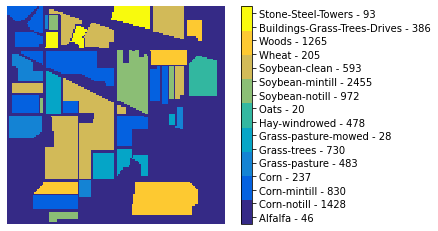

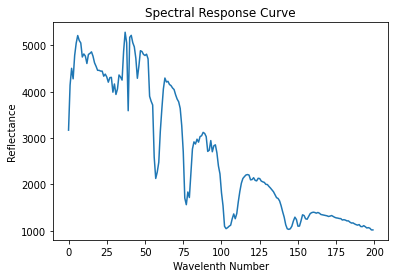

In [ ]:
## Load Data
img = loadmat('/content/drive/My Drive/Major_Project/Data/Indian_Pines.mat')
img_gt = loadmat('/content/drive/My Drive/Major_Project/Data/Indian_Pines_gt.mat')
# img_dr = np.load('/content/drive/My Drive/Major_Project/Test_Results3/test3_reduced_img_25.npy')
# img_dr = np.load('/content/drive/My Drive/Major_Project/Supervised_Results/Indian_Pines/reduced_img_f_dr_25.npy')
# img_dr = np.load('/content/drive/My Drive/Major_Project/unSupervised_Results/Indian_Pines/reduced_img_f_dr_28.npy')
img = img['indian_pines_corrected']
gt = img_gt['indian_pines_gt']
height, width, bands = img.shape[0], img.shape[1], img.shape[2]
num_classes = len(np.unique(gt))
# mymap = plt.get_cmap('parula', 10)
# fig, ax = plt.figure()
# heatmap = ax.pcolor(data, cmap=parula)

#legend
# cbar = plt.colorbar(heatmap)

# plt.figure()
fig, ax = plt.subplots()

lab = [	'Alfalfa - 46',
	'Corn-notill - 1428',
 	'Corn-mintill - 830',
 	'Corn - 237',
 	'Grass-pasture - 483',
 	'Grass-trees - 730',
 	'Grass-pasture-mowed - 28',
 	'Hay-windrowed - 478',
 	'Oats - 20',
 	'Soybean-notill - 972',
 	'Soybean-mintill - 2455',
 'Soybean-clean - 593',
 	'Wheat - 205',
 	'Woods - 1265',
 	'Buildings-Grass-Trees-Drives - 386',
 	'Stone-Steel-Towers - 93']

cax = ax.imshow(gt, interpolation='nearest', cmap=parula_map)
ax.set_axis_off()
fig.add_axes(ax)
t = np.arange(1)+0.5
# Add colorbar, make sure to specify tick locations to match desired ticklabels
cbar = fig.colorbar(cax, ticks=t)
cbar.ax.set_yticklabels(lab)  # vertically oriented colorbar

# plt.colorbar()
plt.savefig('PaviaU_label.png',dpi=300, bbox_inches='tight')

#reshaping image to vector
img = np.reshape(img, [height*width, bands])
img_gt = np.reshape(gt, [height*width,])
#checking background pixels - they will be omitted later from training data
background = img_gt[img_gt == 0]

#sanity checks
print("Number of Label Classes: ", num_classes)
print("Image size: ", img.shape)
# print("Reduced Image size: ", img_dr.shape)
print("Label size: ", img_gt.shape)
print("Background Pixels: ", background.shape)
print("\n Class distribution: => ")
print(tabulate(np.unique(img_gt, return_counts=True), tablefmt="grid"))
# plt.figure(1)
# plt.imshow(gt)
plt.figure(2)
plt.plot(img[0,])
plt.title('Spectral Response Curve')
plt.xlabel('Wavelenth Number')
plt.ylabel('Reflectance')
plt.savefig('SRC.png',dpi=300)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data, N=10)
# For use of "viscm view"

In [ ]:

_parula_data = [[0.2081, 0.1663, 0.5292], 
                [0.2116238095, 0.1897809524, 0.5776761905], 
                [0.212252381, 0.2137714286, 0.6269714286], 
                [0.2081, 0.2386, 0.6770857143], 
                [0.1959047619, 0.2644571429, 0.7279], 
                [0.1707285714, 0.2919380952, 0.779247619], 
                [0.1252714286, 0.3242428571, 0.8302714286], 
                [0.0591333333, 0.3598333333, 0.8683333333], 
                [0.0116952381, 0.3875095238, 0.8819571429], 
                [0.0059571429, 0.4086142857, 0.8828428571], 
                [0.0165142857, 0.4266, 0.8786333333], 
                [0.032852381, 0.4430428571, 0.8719571429], 
                [0.0498142857, 0.4585714286, 0.8640571429], 
                [0.0629333333, 0.4736904762, 0.8554380952], 
                [0.0722666667, 0.4886666667, 0.8467], 
                [0.0779428571, 0.5039857143, 0.8383714286], 
                [0.079347619, 0.5200238095, 0.8311809524], 
                [0.0749428571, 0.5375428571, 0.8262714286], 
                [0.0640571429, 0.5569857143, 0.8239571429], 
                [0.0487714286, 0.5772238095, 0.8228285714], 
                [0.0343428571, 0.5965809524, 0.819852381], 
                [0.0265, 0.6137, 0.8135], 
                [0.0238904762, 0.6286619048, 0.8037619048], 
                [0.0230904762, 0.6417857143, 0.7912666667], 
                [0.0227714286, 0.6534857143, 0.7767571429], 
                [0.0266619048, 0.6641952381, 0.7607190476], 
                [0.0383714286, 0.6742714286, 0.743552381], 
                [0.0589714286, 0.6837571429, 0.7253857143], 
                [0.0843, 0.6928333333, 0.7061666667], 
                [0.1132952381, 0.7015, 0.6858571429], 
                [0.1452714286, 0.7097571429, 0.6646285714], 
                [0.1801333333, 0.7176571429, 0.6424333333], 
                [0.2178285714, 0.7250428571, 0.6192619048], 
                [0.2586428571, 0.7317142857, 0.5954285714], 
                [0.3021714286, 0.7376047619, 0.5711857143], 
                [0.3481666667, 0.7424333333, 0.5472666667], 
                [0.3952571429, 0.7459, 0.5244428571], 
                [0.4420095238, 0.7480809524, 0.5033142857], 
                [0.4871238095, 0.7490619048, 0.4839761905], 
                [0.5300285714, 0.7491142857, 0.4661142857], 
                [0.5708571429, 0.7485190476, 0.4493904762],
                [0.609852381, 0.7473142857, 0.4336857143], 
                [0.6473, 0.7456, 0.4188], 
                [0.6834190476, 0.7434761905, 0.4044333333], 
                [0.7184095238, 0.7411333333, 0.3904761905], 
                [0.7524857143, 0.7384, 0.3768142857], 
                [0.7858428571, 0.7355666667, 0.3632714286], 
                [0.8185047619, 0.7327333333, 0.3497904762], 
                [0.8506571429, 0.7299, 0.3360285714], 
                [0.8824333333, 0.7274333333, 0.3217], 
                [0.9139333333, 0.7257857143, 0.3062761905], 
                [0.9449571429, 0.7261142857, 0.2886428571], 
                [0.9738952381, 0.7313952381, 0.266647619], 
                [0.9937714286, 0.7454571429, 0.240347619], 
                [0.9990428571, 0.7653142857, 0.2164142857], 
                [0.9955333333, 0.7860571429, 0.196652381], 
                [0.988, 0.8066, 0.1793666667], 
                [0.9788571429, 0.8271428571, 0.1633142857], 
                [0.9697, 0.8481380952, 0.147452381], 
                [0.9625857143, 0.8705142857, 0.1309], 
                [0.9588714286, 0.8949, 0.1132428571], 
                [0.9598238095, 0.9218333333, 0.0948380952], 
                [0.9661, 0.9514428571, 0.0755333333], 
                [0.9763, 0.9831, 0.0538]]

_viridis_data = [[0.267004, 0.004874, 0.329415],
                 [0.268510, 0.009605, 0.335427],
                 [0.269944, 0.014625, 0.341379],
                 [0.271305, 0.019942, 0.347269],
                 [0.272594, 0.025563, 0.353093],
                 [0.273809, 0.031497, 0.358853],
                 [0.274952, 0.037752, 0.364543],
                 [0.276022, 0.044167, 0.370164],
                 [0.277018, 0.050344, 0.375715],
                 [0.277941, 0.056324, 0.381191],
                 [0.278791, 0.062145, 0.386592],
                 [0.279566, 0.067836, 0.391917],
                 [0.280267, 0.073417, 0.397163],
                 [0.280894, 0.078907, 0.402329],
                 [0.281446, 0.084320, 0.407414],
                 [0.281924, 0.089666, 0.412415],
                 [0.282327, 0.094955, 0.417331],
                 [0.282656, 0.100196, 0.422160],
                 [0.282910, 0.105393, 0.426902],
                 [0.283091, 0.110553, 0.431554],
                 [0.283197, 0.115680, 0.436115],
                 [0.283229, 0.120777, 0.440584],
                 [0.283187, 0.125848, 0.444960],
                 [0.283072, 0.130895, 0.449241],
                 [0.282884, 0.135920, 0.453427],
                 [0.282623, 0.140926, 0.457517],
                 [0.282290, 0.145912, 0.461510],
                 [0.281887, 0.150881, 0.465405],
                 [0.281412, 0.155834, 0.469201],
                 [0.280868, 0.160771, 0.472899],
                 [0.280255, 0.165693, 0.476498],
                 [0.279574, 0.170599, 0.479997],
                 [0.278826, 0.175490, 0.483397],
                 [0.278012, 0.180367, 0.486697],
                 [0.277134, 0.185228, 0.489898],
                 [0.276194, 0.190074, 0.493001],
                 [0.275191, 0.194905, 0.496005],
                 [0.274128, 0.199721, 0.498911],
                 [0.273006, 0.204520, 0.501721],
                 [0.271828, 0.209303, 0.504434],
                 [0.270595, 0.214069, 0.507052],
                 [0.269308, 0.218818, 0.509577],
                 [0.267968, 0.223549, 0.512008],
                 [0.266580, 0.228262, 0.514349],
                 [0.265145, 0.232956, 0.516599],
                 [0.263663, 0.237631, 0.518762],
                 [0.262138, 0.242286, 0.520837],
                 [0.260571, 0.246922, 0.522828],
                 [0.258965, 0.251537, 0.524736],
                 [0.257322, 0.256130, 0.526563],
                 [0.255645, 0.260703, 0.528312],
                 [0.253935, 0.265254, 0.529983],
                 [0.252194, 0.269783, 0.531579],
                 [0.250425, 0.274290, 0.533103],
                 [0.248629, 0.278775, 0.534556],
                 [0.246811, 0.283237, 0.535941],
                 [0.244972, 0.287675, 0.537260],
                 [0.243113, 0.292092, 0.538516],
                 [0.241237, 0.296485, 0.539709],
                 [0.239346, 0.300855, 0.540844],
                 [0.237441, 0.305202, 0.541921],
                 [0.235526, 0.309527, 0.542944],
                 [0.233603, 0.313828, 0.543914],
                 [0.231674, 0.318106, 0.544834],
                 [0.229739, 0.322361, 0.545706],
                 [0.227802, 0.326594, 0.546532],
                 [0.225863, 0.330805, 0.547314],
                 [0.223925, 0.334994, 0.548053],
                 [0.221989, 0.339161, 0.548752],
                 [0.220057, 0.343307, 0.549413],
                 [0.218130, 0.347432, 0.550038],
                 [0.216210, 0.351535, 0.550627],
                 [0.214298, 0.355619, 0.551184],
                 [0.212395, 0.359683, 0.551710],
                 [0.210503, 0.363727, 0.552206],
                 [0.208623, 0.367752, 0.552675],
                 [0.206756, 0.371758, 0.553117],
                 [0.204903, 0.375746, 0.553533],
                 [0.203063, 0.379716, 0.553925],
                 [0.201239, 0.383670, 0.554294],
                 [0.199430, 0.387607, 0.554642],
                 [0.197636, 0.391528, 0.554969],
                 [0.195860, 0.395433, 0.555276],
                 [0.194100, 0.399323, 0.555565],
                 [0.192357, 0.403199, 0.555836],
                 [0.190631, 0.407061, 0.556089],
                 [0.188923, 0.410910, 0.556326],
                 [0.187231, 0.414746, 0.556547],
                 [0.185556, 0.418570, 0.556753],
                 [0.183898, 0.422383, 0.556944],
                 [0.182256, 0.426184, 0.557120],
                 [0.180629, 0.429975, 0.557282],
                 [0.179019, 0.433756, 0.557430],
                 [0.177423, 0.437527, 0.557565],
                 [0.175841, 0.441290, 0.557685],
                 [0.174274, 0.445044, 0.557792],
                 [0.172719, 0.448791, 0.557885],
                 [0.171176, 0.452530, 0.557965],
                 [0.169646, 0.456262, 0.558030],
                 [0.168126, 0.459988, 0.558082],
                 [0.166617, 0.463708, 0.558119],
                 [0.165117, 0.467423, 0.558141],
                 [0.163625, 0.471133, 0.558148],
                 [0.162142, 0.474838, 0.558140],
                 [0.160665, 0.478540, 0.558115],
                 [0.159194, 0.482237, 0.558073],
                 [0.157729, 0.485932, 0.558013],
                 [0.156270, 0.489624, 0.557936],
                 [0.154815, 0.493313, 0.557840],
                 [0.153364, 0.497000, 0.557724],
                 [0.151918, 0.500685, 0.557587],
                 [0.150476, 0.504369, 0.557430],
                 [0.149039, 0.508051, 0.557250],
                 [0.147607, 0.511733, 0.557049],
                 [0.146180, 0.515413, 0.556823],
                 [0.144759, 0.519093, 0.556572],
                 [0.143343, 0.522773, 0.556295],
                 [0.141935, 0.526453, 0.555991],
                 [0.140536, 0.530132, 0.555659],
                 [0.139147, 0.533812, 0.555298],
                 [0.137770, 0.537492, 0.554906],
                 [0.136408, 0.541173, 0.554483],
                 [0.135066, 0.544853, 0.554029],
                 [0.133743, 0.548535, 0.553541],
                 [0.132444, 0.552216, 0.553018],
                 [0.131172, 0.555899, 0.552459],
                 [0.129933, 0.559582, 0.551864],
                 [0.128729, 0.563265, 0.551229],
                 [0.127568, 0.566949, 0.550556],
                 [0.126453, 0.570633, 0.549841],
                 [0.125394, 0.574318, 0.549086],
                 [0.124395, 0.578002, 0.548287],
                 [0.123463, 0.581687, 0.547445],
                 [0.122606, 0.585371, 0.546557],
                 [0.121831, 0.589055, 0.545623],
                 [0.121148, 0.592739, 0.544641],
                 [0.120565, 0.596422, 0.543611],
                 [0.120092, 0.600104, 0.542530],
                 [0.119738, 0.603785, 0.541400],
                 [0.119512, 0.607464, 0.540218],
                 [0.119423, 0.611141, 0.538982],
                 [0.119483, 0.614817, 0.537692],
                 [0.119699, 0.618490, 0.536347],
                 [0.120081, 0.622161, 0.534946],
                 [0.120638, 0.625828, 0.533488],
                 [0.121380, 0.629492, 0.531973],
                 [0.122312, 0.633153, 0.530398],
                 [0.123444, 0.636809, 0.528763],
                 [0.124780, 0.640461, 0.527068],
                 [0.126326, 0.644107, 0.525311],
                 [0.128087, 0.647749, 0.523491],
                 [0.130067, 0.651384, 0.521608],
                 [0.132268, 0.655014, 0.519661],
                 [0.134692, 0.658636, 0.517649],
                 [0.137339, 0.662252, 0.515571],
                 [0.140210, 0.665859, 0.513427],
                 [0.143303, 0.669459, 0.511215],
                 [0.146616, 0.673050, 0.508936],
                 [0.150148, 0.676631, 0.506589],
                 [0.153894, 0.680203, 0.504172],
                 [0.157851, 0.683765, 0.501686],
                 [0.162016, 0.687316, 0.499129],
                 [0.166383, 0.690856, 0.496502],
                 [0.170948, 0.694384, 0.493803],
                 [0.175707, 0.697900, 0.491033],
                 [0.180653, 0.701402, 0.488189],
                 [0.185783, 0.704891, 0.485273],
                 [0.191090, 0.708366, 0.482284],
                 [0.196571, 0.711827, 0.479221],
                 [0.202219, 0.715272, 0.476084],
                 [0.208030, 0.718701, 0.472873],
                 [0.214000, 0.722114, 0.469588],
                 [0.220124, 0.725509, 0.466226],
                 [0.226397, 0.728888, 0.462789],
                 [0.232815, 0.732247, 0.459277],
                 [0.239374, 0.735588, 0.455688],
                 [0.246070, 0.738910, 0.452024],
                 [0.252899, 0.742211, 0.448284],
                 [0.259857, 0.745492, 0.444467],
                 [0.266941, 0.748751, 0.440573],
                 [0.274149, 0.751988, 0.436601],
                 [0.281477, 0.755203, 0.432552],
                 [0.288921, 0.758394, 0.428426],
                 [0.296479, 0.761561, 0.424223],
                 [0.304148, 0.764704, 0.419943],
                 [0.311925, 0.767822, 0.415586],
                 [0.319809, 0.770914, 0.411152],
                 [0.327796, 0.773980, 0.406640],
                 [0.335885, 0.777018, 0.402049],
                 [0.344074, 0.780029, 0.397381],
                 [0.352360, 0.783011, 0.392636],
                 [0.360741, 0.785964, 0.387814],
                 [0.369214, 0.788888, 0.382914],
                 [0.377779, 0.791781, 0.377939],
                 [0.386433, 0.794644, 0.372886],
                 [0.395174, 0.797475, 0.367757],
                 [0.404001, 0.800275, 0.362552],
                 [0.412913, 0.803041, 0.357269],
                 [0.421908, 0.805774, 0.351910],
                 [0.430983, 0.808473, 0.346476],
                 [0.440137, 0.811138, 0.340967],
                 [0.449368, 0.813768, 0.335384],
                 [0.458674, 0.816363, 0.329727],
                 [0.468053, 0.818921, 0.323998],
                 [0.477504, 0.821444, 0.318195],
                 [0.487026, 0.823929, 0.312321],
                 [0.496615, 0.826376, 0.306377],
                 [0.506271, 0.828786, 0.300362],
                 [0.515992, 0.831158, 0.294279],
                 [0.525776, 0.833491, 0.288127],
                 [0.535621, 0.835785, 0.281908],
                 [0.545524, 0.838039, 0.275626],
                 [0.555484, 0.840254, 0.269281],
                 [0.565498, 0.842430, 0.262877],
                 [0.575563, 0.844566, 0.256415],
                 [0.585678, 0.846661, 0.249897],
                 [0.595839, 0.848717, 0.243329],
                 [0.606045, 0.850733, 0.236712],
                 [0.616293, 0.852709, 0.230052],
                 [0.626579, 0.854645, 0.223353],
                 [0.636902, 0.856542, 0.216620],
                 [0.647257, 0.858400, 0.209861],
                 [0.657642, 0.860219, 0.203082],
                 [0.668054, 0.861999, 0.196293],
                 [0.678489, 0.863742, 0.189503],
                 [0.688944, 0.865448, 0.182725],
                 [0.699415, 0.867117, 0.175971],
                 [0.709898, 0.868751, 0.169257],
                 [0.720391, 0.870350, 0.162603],
                 [0.730889, 0.871916, 0.156029],
                 [0.741388, 0.873449, 0.149561],
                 [0.751884, 0.874951, 0.143228],
                 [0.762373, 0.876424, 0.137064],
                 [0.772852, 0.877868, 0.131109],
                 [0.783315, 0.879285, 0.125405],
                 [0.793760, 0.880678, 0.120005],
                 [0.804182, 0.882046, 0.114965],
                 [0.814576, 0.883393, 0.110347],
                 [0.824940, 0.884720, 0.106217],
                 [0.835270, 0.886029, 0.102646],
                 [0.845561, 0.887322, 0.099702],
                 [0.855810, 0.888601, 0.097452],
                 [0.866013, 0.889868, 0.095953],
                 [0.876168, 0.891125, 0.095250],
                 [0.886271, 0.892374, 0.095374],
                 [0.896320, 0.893616, 0.096335],
                 [0.906311, 0.894855, 0.098125],
                 [0.916242, 0.896091, 0.100717],
                 [0.926106, 0.897330, 0.104071],
                 [0.935904, 0.898570, 0.108131],
                 [0.945636, 0.899815, 0.112838],
                 [0.955300, 0.901065, 0.118128],
                 [0.964894, 0.902323, 0.123941],
                 [0.974417, 0.903590, 0.130215],
                 [0.983868, 0.904867, 0.136897],
                 [0.993248, 0.906157, 0.143936]]

from matplotlib.colors import ListedColormap

cmaps = {}
for (name, data) in (('viridis', _viridis_data),
                     ('parula', _parula_data)):
    cmaps[name] = ListedColormap(data, name=name,N=10)

viridis = cmaps['viridis']
parula_D = cmaps['parula']

In [ ]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


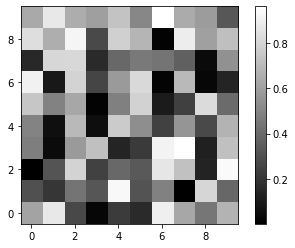

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
mat = np.random.random((10,10))
plt.imshow(mat, origin="lower", cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
np.save('/content/drive/My Drive/Major_Project/Data/Img.npy', img)

SyntaxError: ignored

## > Preprocess

+----+-----+-----+-----+-----+-----+----+-----+----+-----+------+-----+-----+-----+-----+----+
|  1 |   2 |   3 |   4 |   5 |   6 |  7 |   8 |  9 |  10 |   11 |  12 |  13 |  14 |  15 | 16 |
+----+-----+-----+-----+-----+-----+----+-----+----+-----+------+-----+-----+-----+-----+----+
| 30 | 989 | 575 | 156 | 322 | 527 | 21 | 352 | 16 | 709 | 1731 | 402 | 134 | 874 | 274 | 64 |
+----+-----+-----+-----+-----+-----+----+-----+----+-----+------+-----+-----+-----+-----+----+
+----+-----+-----+----+-----+-----+---+-----+---+-----+-----+-----+----+-----+-----+----+
|  1 |   2 |   3 |  4 |   5 |   6 | 7 |   8 | 9 |  10 |  11 |  12 | 13 |  14 |  15 | 16 |
+----+-----+-----+----+-----+-----+---+-----+---+-----+-----+-----+----+-----+-----+----+
| 16 | 439 | 255 | 81 | 161 | 203 | 7 | 126 | 4 | 263 | 724 | 191 | 71 | 391 | 112 | 29 |
+----+-----+-----+----+-----+-----+---+-----+---+-----+-----+-----+----+-----+-----+----+


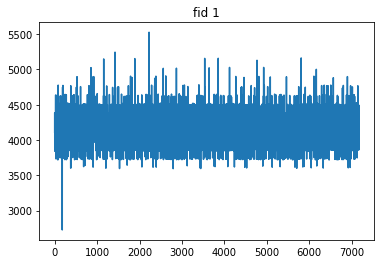

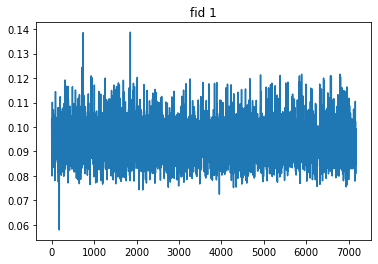

Train vector size:  (7176, 200)
Test vector size:  (3073, 200)
Reduced Train vector size:  (7176, 200)
Reduced Test vector size:  (3073, 200)
Label train vector size:  (7176,)
Label test vector size:  (3073,)


In [ ]:
## Preprocess
img_dr=img

#separate foreground and background
img_fg = img[img_gt != 0]
img_bg = img[img_gt == 0]
img_dr_fg = img_dr[img_gt != 0]
img_dr_bg = img_dr[img_gt == 0]
img_gt_fg = img_gt[img_gt != 0]
img_gt_bg = img_gt[img_gt == 0]

#shuffle data with seed 10
shufflePermutation = np.random.RandomState(seed=10).permutation(len(img_fg))
img_fg = img_fg[shufflePermutation]
img_dr_fg = img_dr_fg[shufflePermutation]
img_gt_fg = img_gt_fg[shufflePermutation]

#define train/test split ratio
split_ratio = 0.7
split = math.ceil(img_fg.shape[0]*split_ratio)

## split into training and testing
#orignal dimension image
img_train = img_fg[:(split+1),:]
img_gt_train = img_gt_fg[:(split+1)]
img_test = img_fg[(split+1):,:]
img_gt_test = img_gt_fg[(split+1):]
#reduced dimension image
img_dr_train = img_dr_fg[:(split+1),:]
img_dr_test = img_dr_fg[(split+1):,:]

# plt.hist(img_train[700,])
# plt.show()

print(tabulate(np.unique(img_gt_train, return_counts=True), tablefmt="grid"))
print(tabulate(np.unique(img_gt_test, return_counts=True), tablefmt="grid"))

plt.figure()
plt.plot(img_train[:,1])
plt.title('fid 1')
plt.show()

## normalize data
min_max_scaler = preprocessing.MinMaxScaler()
#orignal dimension image
img_try= min_max_scaler.fit_transform(img.astype('float32')) 
img_train = preprocessing.normalize(img_train.astype('float32')) #OR 

plt.figure()
plt.plot(img_train[:,1])
plt.title('fid 1')
plt.show()
img_train = min_max_scaler.fit_transform(img_train.astype('float32')) #preprocessing.scale(img_train.astype('float32'))
# plt.figure()
# plt.hist(img_train[700,])
# plt.show()
img_test = preprocessing.normalize(img_test.astype('float32'))
# img_test = min_max_scaler.fit_transform(img_test.astype('float32')) 
# OR  preprocessing.normalize(img_test.astype('float32')) OR preprocessing.scale(img_test.astype('float32'))
#reduced dimension image
img_dr_train = min_max_scaler.fit_transform(img_dr_train.astype('float32'))
img_dr_test = min_max_scaler.fit_transform(img_dr_test.astype('float32'))
#for result of plot before and after reduction
# img_try_fg = img_try[img_gt != 0]
# plt.plot(img_dr_fg[2000])
# plt.figure()
# plt.plot(img_try_fg[2000])
# print(img_gt_fg[2000])

#sanity checks
print("Train vector size: ", img_train.shape)
print("Test vector size: ", img_test.shape)
print("Reduced Train vector size: ", img_dr_train.shape)
print("Reduced Test vector size: ", img_dr_test.shape)
print("Label train vector size: ", img_gt_train.shape)
print("Label test vector size: ", img_gt_test.shape)

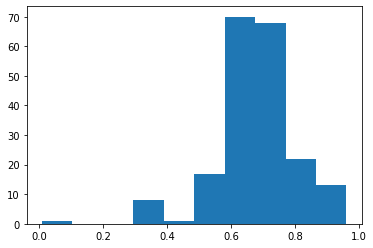

In [ ]:
plt.hist(img_train[700,])
plt.show()

## > Functions

### > SVM

> Model

In [ ]:
## svm

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

def svmFit(xtrain, ytrain, C, gamma, kernel, grid = True):
    if grid:
        #define params and grid
        params_grid = [{'decision_function_shape': ['ovr'], 'max_iter': [1000], 'kernel': ['poly'], 'gamma': [0.005, 1e-3], 'C': [1, 10, 100, 1000]}]
        svmModel = GridSearchCV(SVC(), params_grid, cv=5, return_train_score=True)
    else:
        #define params
        svmModel = svm.SVC(decision_function_shape='ovr', max_iter=-1, gamma=gamma, kernel =kernel, C=C)
    #start time 
    start_time = time.time() 
    svmModel.fit(xtrain, ytrain)
    #end time - display estimated time duration for fitting
    duration = time.time() - start_time
    print("\n --- %s seconds --- \n" % duration)
    return svmModel

> Results

In [ ]:
## svm results

def svmResults(xtrain, ytrain, xtest, ytest, svmModel):
    #get predicted labels for test data
    img_gt_train_predicted_svm = svmModel.predict(xtrain)
    img_gt_predicted_svm = svmModel.predict(xtest)
    test_shape = img_gt_predicted_svm.shape[0]
    #comparsion table - make table to display predcited and true labels
    # label_table_svm = np.concatenate((img_gt_predicted_svm.reshape((test_shape, 1)), ytest.reshape((test_shape, 1))), axis = 1)

    #compute  train & test accuracy
    train_score = svmModel.score(xtrain , ytrain)
    test_score = svmModel.score(xtest  , ytest )
    train_kappa = metrics.cohen_kappa_score(ytrain, img_gt_train_predicted_svm)
    test_kappa = metrics.cohen_kappa_score(ytest, img_gt_predicted_svm)
                                           
    #print test and train accuracy
    print("Report for Classifier: \n")
    print("Training set score for SVM: %f" % train_score)
    print("Testing  set score for SVM: %f" % test_score)
    print("Train Kappa score for SVM: %f" % train_kappa)
    print("Test Kappa score for SVM: %f" % test_kappa)
    print("\n")

    #print confusion matrix and classification rpeort
    print(confusion_matrix(ytest, img_gt_predicted_svm))
    print("\n")
    print(classification_report(ytest, img_gt_predicted_svm))

    #print comparison table (first 10)
    # headers = ["Predicted Label", "Ground Truth Label"]
    # print(tabulate(label_table_svm[1:10], headers, tablefmt="grid"))

    table.append([ C, gamma, kernel, train_score, test_score, train_kappa, test_kappa])

### > CNN

> Model

In [ ]:
## CNN model

def cnnFit(r, xtrain, ytrain_ohe, xtest, ytest_ohe):
    #define params, preprocess
    verbose, epochs, batch_size = 0, 10, 32
    n_timesteps, n_features, n_outputs = 200, 1, ytrain_ohe.shape[1]
    xtrain = np.reshape(xtrain,[xtrain.shape[0] , xtrain.shape[1], 1])
    xtest = np.reshape(xtest,[xtest.shape[0] , xtest.shape[1], 1])

    #define model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    # model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()

    #start time 
    start_time = time.time()
    #fit model
    model.fit(xtrain, ytrain_ohe, epochs=epochs, batch_size=batch_size, verbose=verbose)
    #end time - display estimated time diration for fitting
    print("--- %s seconds ---" % (time.time() - start_time)) #end time
    #evaluate model
    _, accuracy = model.evaluate(xtest, ytest_ohe, batch_size=batch_size, verbose=0)
    return [model, accuracy]

> Results

In [ ]:
def cnnResults(scores, cnnModel, cnnScore, xtrain, ytrain_ohe, xtest, ytest_ohe):
    #derive iter number and scores 
    sc = [[i] for i in scores]
    it = [[i] for i in range(1,6)]
    #insert in table as columns side by side
    table = np.concatenate((it, sc), axis = 1)
    #print summary table
    print(tabulate(table, ["Iteration", "Score"], tablefmt="github"))
    #print mean and std of scores
    m, s = statistics.mean(scores), statistics.stdev(scores)
    print('\n Mean Accuracy: %.3f%% Standard Deviation: (+/-%.3f)' % (m, s))

    #reshaping
    xtrain = np.reshape(xtrain,[xtrain.shape[0], xtrain.shape[1], 1])
    xtest = np.reshape(xtest,[xtest.shape[0] ,xtest.shape[1], 1])
    #print train & test accuracy
    print("Report for CNN Classifier: \n")
    ypredicted_cnn, train_score = cnnModel.evaluate(xtrain, ytest_ohe, verbose=0)
    print("Training set score CNN: %f" % train_score)
    print("Testing  set score for CNN: %f" % cnnScore)
    #print confusion matrix and classification rpeort
    print(confusion_matrix(ytest, ypredicted_cnn))
    print("\n")
    print(classification_report(ytest, ypredicted_cnn))

## > Original Dimension - Training

### > SVM

 > SVM - Model

In [ ]:
table = [] 
table_header = ["C", "Gamma", "Kernel", "Train_Score", "Test_Score", "Train_Kappa", "Test_Kappa"]

orig_stdout = sys.stdout
f = open('/content/drive/My Drive/Major_Project/unSupervised_Results/Indian_Pines/out.txt', 'w')
sys.stdout = f

for C in [1,5,10,50,100,500,1000]:
    for gamma in [0.5,0.1,0.05,0.005,'scale']:
        for kernel in ['rbf','poly']:
            print("-------------------------------------------------------------")
            svmModel = svmFit(img_train, img_gt_train, C, gamma, kernel, grid = False)
            svmResults(img_train, img_gt_train, img_test, img_gt_test, svmModel)
            print("-------------------------------------------------------------")
            del svmModel


df = pd.DataFrame(table, columns= table_header)
full_path = '/content/drive/My Drive/Major_Project/unSupervised_Results/Indian_Pines/Classification.csv'
df.to_csv(full_path, index = False, header=True)

print(tabulate(table, table_header, tablefmt="github"))
sys.stdout = orig_stdout
f.close()

In [ ]:
#svm- w/o grid Search - model
svmModel = svmFit(img_train, img_gt_train, 500, 0.09, 'poly', grid = False)

#svm- grid Search - Results
# svmModel_grid = svmFit(img_train, img_gt_train, grid = True)
# print(svmModel_grid.cv_results_)


 --- 13.907594203948975 seconds --- 



 > SVM - Results

In [ ]:
#svm w/o gridsearch - Results
svmResults(img_train, img_gt_train, img_test, img_gt_test, svmModel)

#choose best estimator svm model from grid
# svmModel_grid = svmModel_grid.best_estimator_
#svm - gridsearch - Results
# svmResults(img_train, img_gt_train, img_test, img_gt_test, svmModel_grid)

Report for Classifier: 

Training set score for SVM: 0.474777
Testing  set score for SVM: 0.456232
Train Kappa score for SVM: 0.353932
Test Kappa score for SVM: 0.334280


[[  0   0   0   0   0   0   0  16   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   2   0   0 436   0   0   0   0   0]
 [  0   0   0   0   0   1   0   1   0   0 253   0   0   0   0   0]
 [  0   3   0   0   0   3   0   6   0   0  69   0   0   0   0   0]
 [  0   0   0   0   0  37   0  14   0   0   2   0   0 108   0   0]
 [  0   0   0   0   0 179   0  11   0   0   0   0   0  13   0   0]
 [  0   0   0   0   0   0   0   6   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 126   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   4   0   0 259   0   0   0   0   0]
 [  0   0   0   0   0   6   0  11   0   0 707   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 191   0   0   0   0   0]
 [  0   0   0   0   0  7

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### > CNN

> CNN - Model

In [ ]:
#one hot encoding
img_gt_train_ohe = keras.utils.to_categorical(img_gt_train-1) #Eliminating background class in OHE- i.e. 16 classes now
img_gt_test_ohe = keras.utils.to_categorical(img_gt_test-1)
#sanity check
print(img_gt_train_ohe.shape)

#list to store scores for 5 iterations of model
scores = list()
best_score = 0
#run model for 5 iterations - will consider average
for r in range(5):
    #evaluate and fit model
    [model, score] = cnnFit(r, img_train, img_gt_train_ohe, img_test, img_gt_test_ohe)
    score = score * 100.0

    #get best model from 5 iterations
    if score > best_score:
      best_cnnModel = model
      best_score = score
    # if score>temp_score:
    #   best_cnnModel = model
    #   best_score = score
    # else:

    print('>#%d: %.3f' % (r+1, score))
    #add obtained score to the list
    scores.append(score)

> CNN - Results

In [ ]:
cnnResults(scores, best_cnnModel, best_score, img_train, img_gt_train_ohe, img_test, img_gt_test_ohe)

## > Reduced Dimension - Training

### > SVM

> SVM - Model

In [ ]:
table = [] 
table_header = ["C", "Gamma", "Kernel", "Train_Score", "Test_Score", "Train_Kappa", "Test_Kappa"]

orig_stdout = sys.stdout
f = open('/content/drive/My Drive/Major_Project/unSupervised_Results/Indian_Pines/out_DR.txt', 'w')
sys.stdout = f

for C in [1,5,10,50,100,500,1000]:
    for gamma in [0.5,0.1,0.05,0.005,'scale']:
        for kernel in ['rbf','poly']:
            print("-------------------------------------------------------------")
            svmModel_dr = svmFit(img_dr_train, img_gt_train, C, gamma, kernel, grid = False)
            svmResults(img_dr_train, img_gt_train, img_dr_test, img_gt_test, svmModel_dr)
            print("-------------------------------------------------------------")
            del svmModel_dr


df = pd.DataFrame(table, columns= table_header)
full_path = '/content/drive/My Drive/Major_Project/unSupervised_Results/Indian_Pines/Classification_DR.csv'
df.to_csv(full_path, index = False, header=True)

print(tabulate(table, table_header, tablefmt="github"))
sys.stdout = orig_stdout
f.close()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificat

In [ ]:
#svm- w/o gridSearch - model
svmModel_dr = svmFit(img_dr_train, img_gt_train, 500, 0.09, 'poly', grid = False)

#svm- gridSearch - Results
# svmModel_dr_grid = svmFit(img_dr_train, img_gt_train, grid = True)


 --- 1.7031354904174805 seconds --- 



> SVM - Results

In [ ]:
#svm w/o gridsearch - Results
svmResults(img_dr_train, img_gt_train, img_dr_test, img_gt_test, svmModel_dr)

#choose best estimator svm model from grid
# svmModel_dr_grid = svmModel_dr_grid.best_estimator_
#svm - gridsearch - Results
# svmResults(img_dr_train, img_gt_train, img_dr_test, img_gt_test, svmModel_dr_grid)

Report for Classifier: 

Training set score for SVM: 0.738573
Testing  set score for SVM: 0.692483
Train Kappa score for SVM: 0.697506
Test Kappa score for SVM: 0.645184


[[  1   0   0   0   0   0   0  15   0   0   0   0   0   0   0   0]
 [  0 285   2   6   1   0   0   1   0  38  96  10   0   0   0   0]
 [  0  13 115  10   0   0   0   0   0  16  86  15   0   0   0   0]
 [  0  14   8  42   0   3   0   0   0   0   6   8   0   0   0   0]
 [  0   1   0   1 121   8   0   4   0   0   0   1   0  25   0   0]
 [  0   2   0   1   6 184   0   0   0   0   0   0   6   0   4   0]
 [  0   0   0   0   0   0   6   1   0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0 125   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   0   0   0   0   0   0   0   0   0   0]
 [  0  34   0   1   2   1   0   1   0 152  70   2   0   0   0   0]
 [  0  64  18   5   4   5   2   2   0  42 571  11   0   0   0   0]
 [  0  43  11   1   0   0   0   0   0  29  66  41   0   0   0   0]
 [  0   0   0   0   1   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### > CNN

> CNN - Model

In [ ]:
#one hot encoding
img_gt_train_ohe = keras.utils.to_categorical(img_gt_train-1) #Eliminating background class in OHE- i.e. 16 classes now
img_gt_test_ohe = keras.utils.to_categorical(img_gt_test-1)
#sanity check
print(img_gt_train_ohe.shape)

#list to store scores for 5 iterations of model
scores_dr = list()
best_score_dr = 0
#run model for 5 iterations - will consider average
for r in range(5):
  #evaluate and fit model
  [model, score] = cnnFit(r, img_dr_train, img_gt_train_ohe, img_dr_test, img_gt_test_ohe)
  score = score * 100.0
  #get best model from 5 iterations
  if score > best_score_dr:
    best_cnnModel_dr = model
    best_score_dr = score
    
  print('>#%d: %.3f' % (r+1, score))
  #add obtained score to the list
  scores_dr.append(score)

> CNN - Results

In [ ]:
cnnResults(scores_dr, best_cnnModel_dr, best_score_dr, img_dr_train, img_gt_train_ohe, img_dr_test, img_gt_test_ohe)

In [ ]:
# img_test_new = np.concatenate((img_test, img_bg))
# img_gt_test_new = np.concatenate((ypredicted_svm, img_gt_bg))
# svmScore_new = svmModel.score(img_test_new, img_gt_test++_new)
# print(svmScore_new)
import numpy as np
a = np.load('/content/drive/My Drive/Major_Project/Supervised_Results/reduced_img_f_dr_20.npy')
print(a.shape)

(21025, 20)
